# 🧹 Task 1 — Data Preparation  
### Saiket Systems – Data Science Internship

**Objective:**

This notebook prepares the Telco Customer Churn dataset for further analysis and modeling.  
It covers:

- Loading and inspecting raw data  
- Handling missing values  
- Fixing incorrect data types  
- Removing duplicates  
- Detecting and treating outliers  
- Cleaning categorical variables  
- Encoding features  
- Before vs After comparison
- Exporting the final cleaned dataset  

A clean and consistent dataset ensures reliable results for EDA, segmentation, and machine learning tasks that follow.


In [34]:
# ================================
# 1 — IMPORTS & SETTINGS
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)


## 📥 2 — Load Dataset

We load the raw CSV file and take an initial look at the shape & first few rows.


In [35]:
raw_path = "dataset/Telco_Customer_Churn_Dataset.csv"
assert os.path.exists(raw_path), f"File not found: {raw_path}"

df_raw = pd.read_csv(raw_path)

# Replace blank strings with NaN
df_raw = df_raw.replace(" ", np.nan)

print("Raw shape:", df_raw.shape)
display(df_raw.head())


Raw shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🔍 3 — Initial Overview

We inspect:
- Data types
- Missing values
- Descriptive statistics


In [13]:
print("\n--- INFO ---")
display(df_raw.info())

print("\n--- Missing values per column ---")
display(df_raw.isnull().sum())

print("\n--- Descriptive Statistics ---")
display(df_raw.describe(include='all').T)



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

None


--- Missing values per column ---


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


--- Descriptive Statistics ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🌡️ 4 — Missing Value Visualization

A heatmap allows us to **visually inspect missing patterns**.


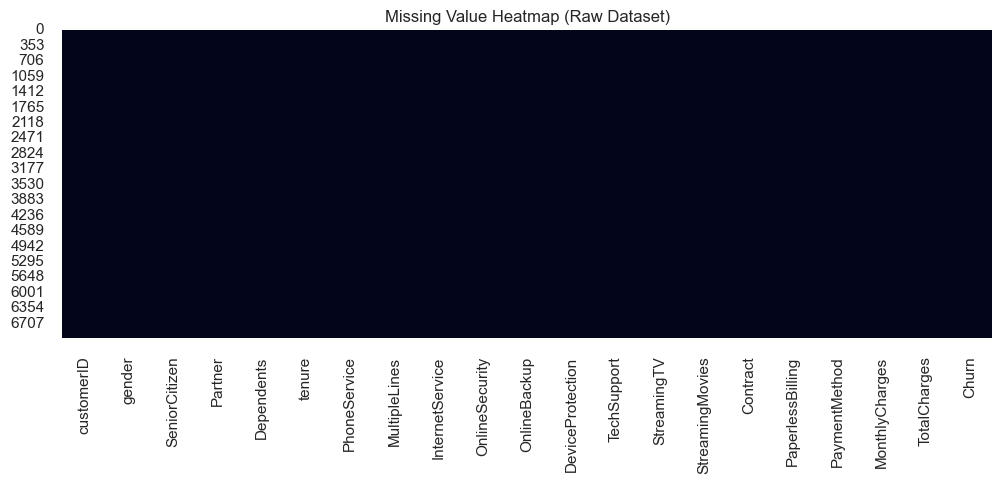

TotalCharges    0.156183
dtype: float64

In [36]:
plt.figure(figsize=(12,4))
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Missing Value Heatmap (Raw Dataset)")
plt.show()

missing_pct = (df_raw.isnull().sum() / len(df_raw) * 100).sort_values(ascending=False)
display(missing_pct[missing_pct > 0])

## 🧽 5 — Cleaning Plan

We will now:

1. Fix incorrect data types (TotalCharges → numeric)  
2. Impute missing values  
3. Remove duplicates  
4. Normalize text columns  
5. Detect & cap outliers  
6. Encode categorical variables  


In [37]:
df = df_raw.copy()
initial_rows, initial_cols = df.shape

## 🔧 6 — Convert *TotalCharges* to Numeric

This column contains spaces → stored as `object`.  
We convert it to numeric and impute missing values using median.


In [38]:
# Convert to numeric (this will create NaN for invalid entries)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing in TotalCharges:", df['TotalCharges'].isnull().sum())

# Fill missing using median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Missing in TotalCharges: 11


C:\Users\Welcome\AppData\Local\Temp\ipykernel_11400\1917935768.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## ✂️ 7 — Normalize Text Columns

We remove spaces from categorical values to avoid encoding issues.


In [39]:
obj_cols = df.select_dtypes(include='object').columns.tolist()

for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

df[obj_cols].nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

## 🗑️ 8 — Remove Duplicates


In [40]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print("Duplicates removed:", before - after)


Duplicates removed: 0


## 📊 9 — Outlier Detection

We visualize outliers for numeric columns:
- tenure  
- MonthlyCharges  
- TotalCharges  


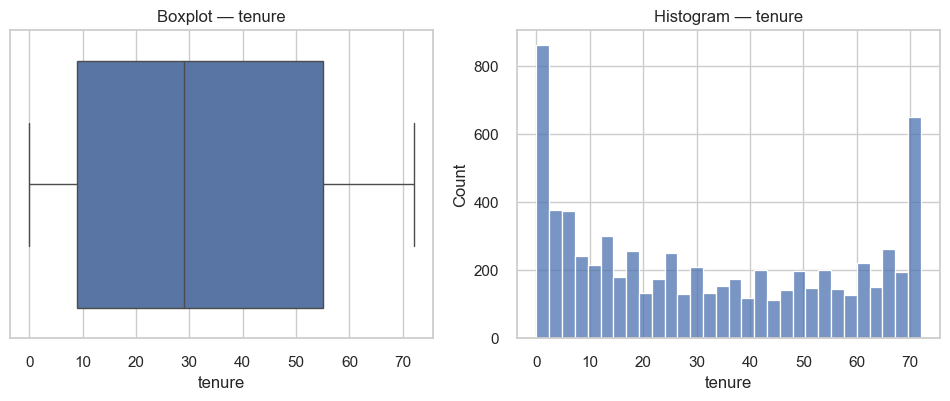

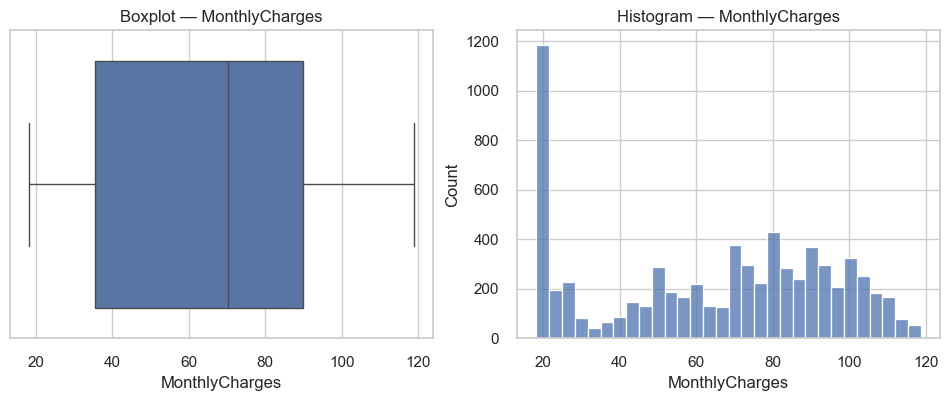

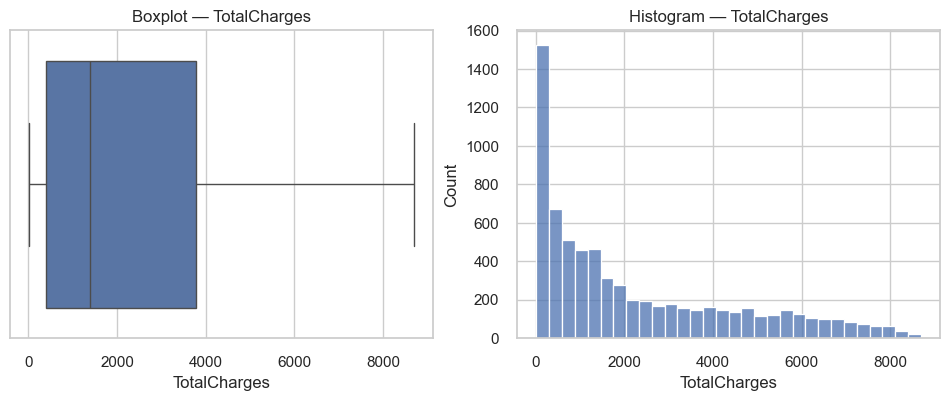

In [41]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for c in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot — {c}")

    plt.subplot(1,2,2)
    sns.histplot(df[c], bins=30)
    plt.title(f"Histogram — {c}")

    plt.show()


## ✂️ 10 — Outlier Capping (1st–99th percentile)
This prevents extreme values from affecting the model.


In [43]:
def cap(s):
    l = s.quantile(0.01)
    u = s.quantile(0.99)
    return s.clip(l, u), l, u

cap_info = {}
for c in num_cols:
    df[c], low, up = cap(df[c])
    cap_info[c] = {"lower": float(low), "upper": float(up)}

cap_info


{'tenure': {'lower': 1.0, 'upper': 72.0},
 'MonthlyCharges': {'lower': 19.2, 'upper': 114.71682},
 'TotalCharges': {'lower': 19.9, 'upper': 8037.867479999999}}

## ⚖️ 11 — Class Balance (Important for Churn!)

We check if the dataset is imbalanced.


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


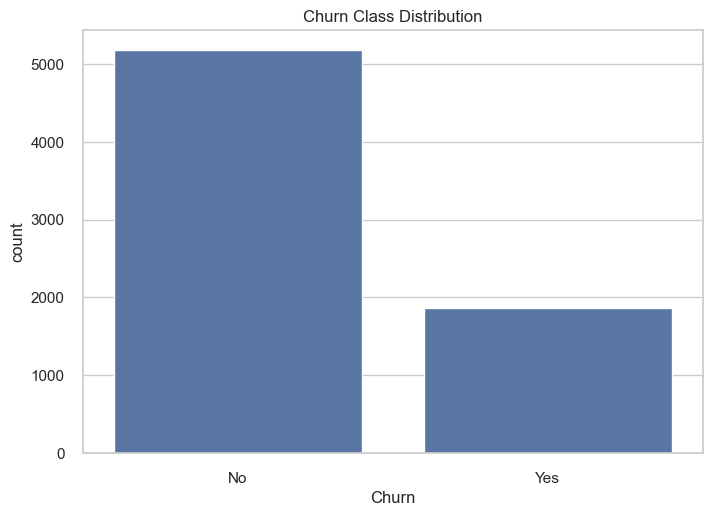

In [44]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

sns.countplot(x=df['Churn'])
plt.title("Churn Class Distribution")
plt.show()


## 🏷️ 12 — One-Hot Encoding

We convert all object (categorical) columns into numeric using dummy variables.
    

In [45]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols = [c for c in cat_cols if c != "customerID"]  # exclude ID

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original Columns:", df.shape[1])
print("Encoded Columns:", df_encoded.shape[1])

Original Columns: 21
Encoded Columns: 32


## 📊 13 — Before vs After Comparison  
We ensure preprocessing did not distort numeric distributions.


In [46]:
orig_stats = df[num_cols].describe().T
enc_stats  = df_encoded[num_cols].describe().T

display(orig_stats)
display(enc_stats)

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.372710,24.557454,1.0,9.000,29.000,55.00,72.00000
MonthlyCharges,7043.0,64.749566,30.062606,19.2,35.500,70.350,89.85,114.71682
TotalCharges,7043.0,2279.347603,2258.504639,19.9,402.225,1397.475,3786.60,8037.86748


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.372710,24.557454,1.0,9.000,29.000,55.00,72.00000
MonthlyCharges,7043.0,64.749566,30.062606,19.2,35.500,70.350,89.85,114.71682
TotalCharges,7043.0,2279.347603,2258.504639,19.9,402.225,1397.475,3786.60,8037.86748


## 🔍 14 — Final Missing Value Check


In [47]:
print("Final Missing Values:", df_encoded.isnull().sum().sum())


Final Missing Values: 0


## 💾 15 — Save Cleaned Dataset


In [48]:
clean_path = "dataset/Telco_Customer_Churn_Dataset_cleaned.csv"
df_encoded.to_csv(clean_path, index=False)

print("Saved at:", clean_path)


Saved at: dataset/Telco_Customer_Churn_Dataset_cleaned.csv


## 📌 16 — Cleaning Summary


In [49]:
summary = {
    "Initial Rows": initial_rows,
    "Final Rows": df_encoded.shape[0],
    "Initial Columns": initial_cols,
    "Final Columns": df_encoded.shape[1],
    "Duplicates Removed": before - after,
    "Missing After Cleaning": int(df_encoded.isnull().sum().sum()),
    "Outlier Capping": cap_info,
    "Saved File": clean_path
}

display(pd.Series(summary))


Initial Rows                                                           7043
Final Rows                                                             7043
Initial Columns                                                          21
Final Columns                                                            32
Duplicates Removed                                                        0
Missing After Cleaning                                                    0
Outlier Capping           {'tenure': {'lower': 1.0, 'upper': 72.0}, 'Mon...
Saved File                 dataset/Telco_Customer_Churn_Dataset_cleaned.csv
dtype: object

# ✅ TASK-1 COMPLETED  
Dataset is now fully cleaned and ready for:

- **Task-2 (EDA)**
- **Task-3 (Feature Engineering)**
- **Task-4 (Modeling)**


